In [7]:
from PIL import Image,ImageDraw,ImageOps,ImageFilter
import numpy as np 
from scipy import fftpack

## STEP 1 ##
im1=Image.open("pika.jpeg")
im1=ImageOps.grayscale(im1)
im1.show()
print("s",im1.size)
## working on this image array
im_W=np.array(im1).T

print("before",im_W.shape)
if(im_W.shape[0]%2==0):
    im_W=np.pad(im_W, ((1,0),(0,0)), 'constant')

if(im_W.shape[1]%2==0):
    im_W=np.pad(im_W, ((0,0),(1,0)), 'constant')

print("after",im_W.shape)
Boxblur=np.ones((3, 3)) / 9
dim=Boxblur.shape[0]

##padding before frequency domain multipication
pad_size=(Boxblur.shape[0]-1)/2
pad_size=int(pad_size)
##padded the image(starts here)

p_im=np.pad(im_W, ((pad_size,pad_size),(pad_size,pad_size)), 'constant')
t_b=(p_im.shape[0]-dim)/2
l_r=(p_im.shape[1]-dim)/2
t_b=int(t_b)
l_r=int(l_r)

##padded the image(ends here)

## padded the kernel(starts here)
k_im=np.pad(Boxblur, ((t_b,t_b),(l_r,l_r)), 'constant')
print("hjhj",k_im)
print("kernel",k_im.shape)

##fourier transforms image and kernel
fft_im = fftpack.fftshift(fftpack.fft2(p_im))
fft_k  = fftpack.fftshift(fftpack.fft2(k_im))
con_in_f=fft_im*fft_k
ifft2 = abs(fftpack.ifft2(fftpack.ifftshift(con_in_f)))
convolved=(np.log(abs(ifft2))* 255 / np.amax(np.log(abs(ifft2)))).astype(np.uint8)
final=Image.fromarray(convolved.T)
final.show()
u=im1.filter(ImageFilter.Kernel((3,3), [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9], scale=None, offset=0))
u.show()

s (203, 257)
before (203, 257)
after (203, 257)
hjhj [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
kernel (205, 259)


In [34]:
image_shape = (10, 10)

width, height = image_shape

blur_kernel2d = np.arange(1, 10).reshape(3, 3)
k = blur_kernel2d.shape[0]

grid = np.zeros(width * height)

padded_grid = np.pad(
    np.arange(width * height).reshape(width, height),
    (k//2, k//2),
    mode='wrap'
)

strides = np.lib.stride_tricks.sliding_window_view(
    padded_grid, (k, k)).reshape(width * height, k ** 2)

grid[strides[0]] = blur_kernel2d.flatten()

grid = grid.reshape(width, height)

print(grid)

[[5. 6. 0. 0. 0. 0. 0. 0. 0. 4.]
 [8. 9. 0. 0. 0. 0. 0. 0. 0. 7.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 3. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [35]:
print(np.arange(width * height).reshape(width, height))

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


In [38]:
l_kernel = np.array(
    [[ 0, -1,  0],[-1,  4, -1],[ 0, -1,  0]]
)

In [46]:
l_kernel

array([[ 0, -1,  0],
       [-1,  4, -1],
       [ 0, -1,  0]])

In [47]:
np.pad(l_kernel, (1, 1), 'edge')

array([[ 0,  0, -1,  0,  0],
       [ 0,  0, -1,  0,  0],
       [-1, -1,  4, -1, -1],
       [ 0,  0, -1,  0,  0],
       [ 0,  0, -1,  0,  0]])

In [54]:
import PIL
from matplotlib import pyplot as plt
print('Pillow Version:', PIL.__version__)

Pillow Version: 9.1.0


In [85]:
np.save('madoka.npy', np.asarray(Image.open('madoka.jpg').convert('L')) / 255)


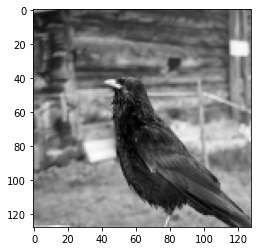

In [81]:
data = np.asarray(image.convert('L')) / 255
plt.imshow(data, cmap='gray')
np.save('bird.npy', data)

[[0.64313725 0.62745098 0.63137255 ... 0.42352941 0.38039216 0.37254902]
 [0.53333333 0.49803922 0.47843137 ... 0.4627451  0.42352941 0.42352941]
 [0.21176471 0.18039216 0.15294118 ... 0.50588235 0.45098039 0.45098039]
 ...
 [0.55686275 0.56470588 0.54117647 ... 0.23529412 0.33333333 0.40784314]
 [0.54901961 0.54901961 0.53333333 ... 0.19607843 0.24705882 0.30980392]
 [0.7372549  0.7372549  0.71764706 ... 0.21176471 0.20392157 0.2745098 ]]


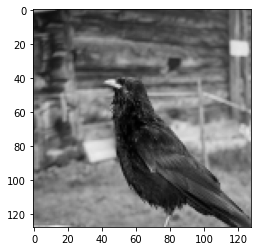

In [82]:
loaded_data = np.load('bird.npy')
print(loaded_data)
plt.imshow(loaded_data, plt.get_cmap('gray'), vmin=0, vmax=1)